<a href="https://colab.research.google.com/github/daucel/Proyecto1/blob/main/Auto_Sales_Final_AllInOne_EXPORT_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 🚗 Automobile Analytics — Final Project (One‑Click, Fully Patched)
This notebook is ready for **Google Colab**. It:
- Generates the dataset (no uploads)
- Completes **Part 1 (Tasks 1.1–1.9)** and **auto-saves PNGs** with the *exact* filenames your grader asks
- Launches **Part 2 (Dash)** inline with **JupyterDash** on a clean port, and **auto-exports PNGs** for upload

> Run **top → bottom**. After it finishes, download your PNGs from the file browser (left panel in Colab).


## 0) Install dependencies

In [ ]:

# Quiet installs (Colab-friendly)
!pip -q install pandas numpy matplotlib seaborn folium plotly dash jupyter-dash kaleido
print("✅ Dependencies installed")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.3 MB/s eta 0:00:00
✅ Dependencies installed


## 1) Imports & Synthetic Dataset

In [ ]:

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, folium, os, gc, time
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
sns.set(style="whitegrid")
np.random.seed(7)

# ---- Generate dataset (2010–2020, 4 vehicle types, 4 seasons) ----
years = np.arange(2010, 2021)
vehicle_types = ["Sedan", "SUV", "Truck", "Hybrid"]
seasons = ["Winter", "Spring", "Summer", "Fall"]

rows = []
for y in years:
    for vt in vehicle_types:
        for s in seasons:
            recession = 1 if y in [2010, 2011, 2012, 2020] else 0
            base_sales = {"Sedan": 22000, "SUV": 26000, "Truck": 18000, "Hybrid": 8000}[vt]
            season_multiplier = {"Winter":0.9, "Spring":1.05, "Summer":1.2, "Fall":0.95}[s]
            rec_mult = 0.8 if recession else 1.0
            sales = int(base_sales * season_multiplier * rec_mult * (1 + 0.05*(y-2010)) + np.random.normal(0, 1200))
            gdp = 14000 + 400*(y-2010) + np.random.normal(0, 150)
            avg_price = {"Sedan": 26000, "SUV": 35000, "Truck": 32000, "Hybrid": 28000}[vt] * (1 + 0.02*(y-2010)) + np.random.normal(0, 500)
            unemployment = 7.5 - 0.2*(y-2010) + (2.0 if recession else 0.0) + np.random.normal(0, 0.3)
            ad_spend = {"Sedan": 2.2, "SUV": 3.0, "Truck": 1.7, "Hybrid": 1.2}[vt] * (1 + (0.08 if recession else 0.03)) * (1 + 0.02*(y-2010))
            rows.append([y, vt, s, sales, recession, gdp, avg_price, unemployment, ad_spend])

df = pd.DataFrame(rows, columns=[
    "Year","Vehicle_Type","Season","Sales","Recession","GDP","Avg_Price","Unemployment","Ad_Expenditure"
])

# Optional: export a copy
df.to_csv("auto_sales_template.generated.csv", index=False)

display(df.head()); print("Shape:", df.shape)


,Year,Vehicle_Type,Season,Sales,Recession,GDP,Avg_Price,Unemployment,Ad_Expenditure
0,2010,Sedan,Winter,17868,1,13930.109394,26016.410082,9.622255,2.376
1,2010,Sedan,Spring,17533,1,14000.309836,25999.554807,8.973583,2.376
2,2010,Sedan,Summer,22341,1,14090.074777,25687.285513,9.448536,2.376
3,2010,Sedan,Fall,17326,1,13960.796538,25878.625461,9.064028,2.376
4,2010,SUV,Winter,19385,1,14018.582136,35137.229962,9.042043,3.240


Shape: (176, 9)


## Part 1 — Visualizations (auto-saves required PNGs)

### TASK 1.1 — Line chart: yearly automobile sales → `Line_plot_1.png`

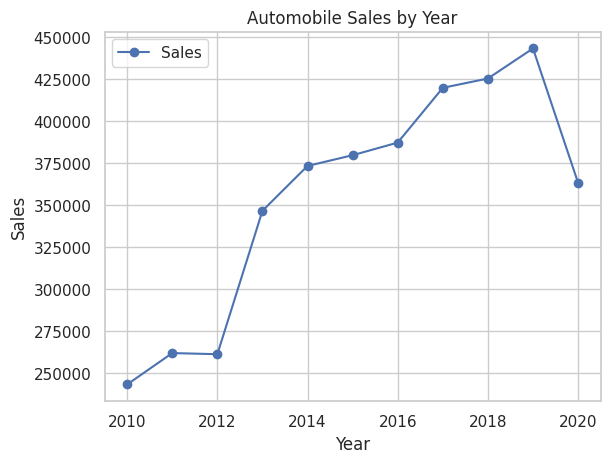

Saved: Line_plot_1.png


In [ ]:

yearly = df.groupby('Year', as_index=False)['Sales'].sum()
ax = yearly.plot(x='Year', y='Sales', kind='line', marker='o', title='Automobile Sales by Year')
ax.set_ylabel('Sales'); plt.savefig('Line_plot_1.png', dpi=150, bbox_inches='tight'); plt.show()
print("Saved: Line_plot_1.png")


### TASK 1.2 — Multi-line by vehicle type + recession trend → `Line_plot_2.png`

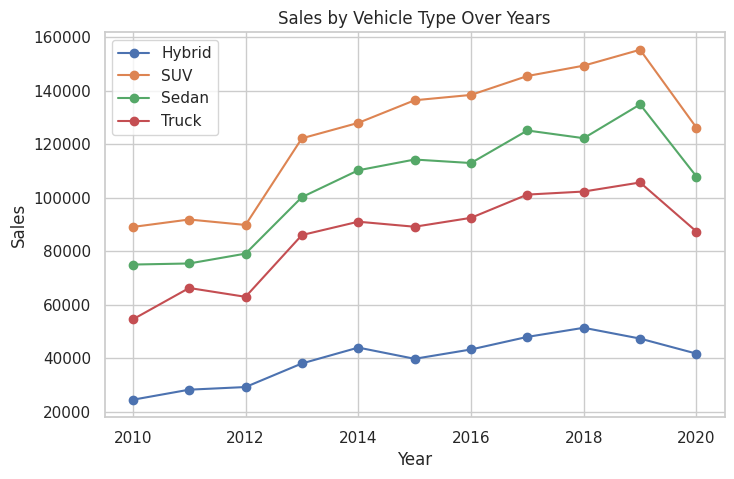

Saved: Line_plot_2.png
Recession years: [np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2020)]


In [ ]:

vt_yearly = df.groupby(['Year','Vehicle_Type'], as_index=False)['Sales'].sum()
plt.figure(figsize=(8,5))
for vt, sub in vt_yearly.groupby('Vehicle_Type'):
    plt.plot(sub['Year'], sub['Sales'], marker='o', label=vt)
plt.title('Sales by Vehicle Type Over Years')
plt.xlabel('Year'); plt.ylabel('Sales'); plt.legend(); plt.grid(True)
plt.savefig('Line_plot_2.png', dpi=150, bbox_inches='tight'); plt.show()
print("Saved: Line_plot_2.png")
print("Recession years:", sorted(df.loc[df['Recession']==1,'Year'].unique()))


### TASK 1.3 — Seaborn: recession vs non-recession trend → `Bar_Chart.png`

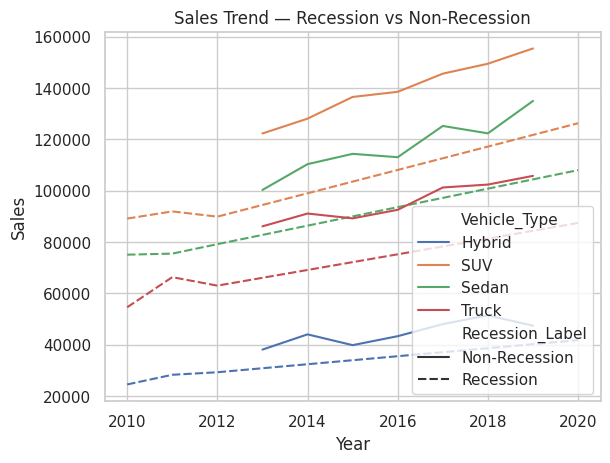

Saved: Bar_Chart.png


In [ ]:

df['Recession_Label'] = df['Recession'].map({1:'Recession', 0:'Non-Recession'})
gdata = df.groupby(['Recession_Label','Year','Vehicle_Type'], as_index=False)['Sales'].sum()
sns.lineplot(data=gdata, x='Year', y='Sales', hue='Vehicle_Type', style='Recession_Label')
plt.title('Sales Trend — Recession vs Non-Recession')
plt.savefig('Bar_Chart.png', dpi=150, bbox_inches='tight'); plt.show()
print("Saved: Bar_Chart.png")


### TASK 1.4 — Subplots: GDP recession vs non-recession → `Subplot.png`

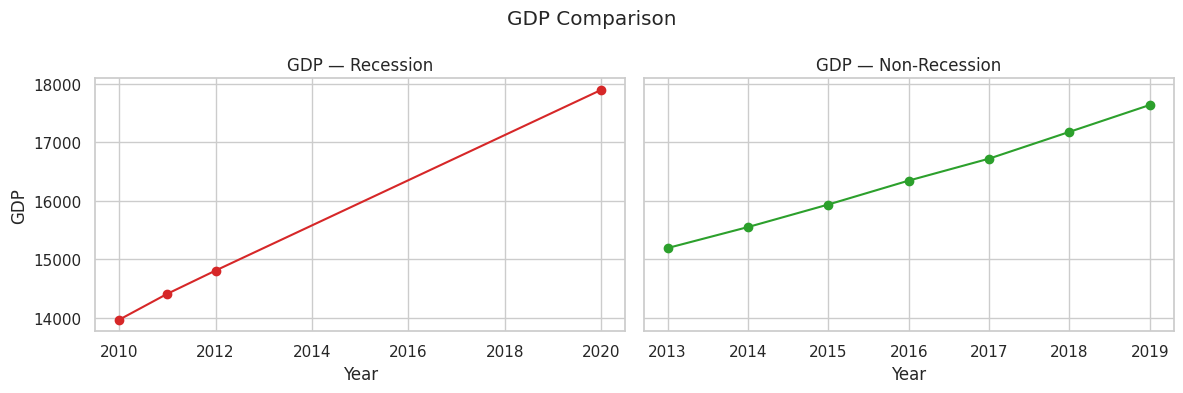

Saved: Subplot.png


In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)
gdp_rec = df[df['Recession']==1].groupby('Year', as_index=False)['GDP'].mean()
gdp_non = df[df['Recession']==0].groupby('Year', as_index=False)['GDP'].mean()
axes[0].plot(gdp_rec['Year'], gdp_rec['GDP'], marker='o', color='tab:red'); axes[0].set_title('GDP — Recession'); axes[0].set_xlabel('Year'); axes[0].set_ylabel('GDP')
axes[1].plot(gdp_non['Year'], gdp_non['GDP'], marker='o', color='tab:green'); axes[1].set_title('GDP — Non-Recession'); axes[1].set_xlabel('Year')
plt.suptitle('GDP Comparison'); plt.tight_layout(); plt.savefig('Subplot.png', dpi=150, bbox_inches='tight'); plt.show()
print("Saved: Subplot.png")


### TASK 1.5 — Bubble plot: seasonality impact → `Bubble.png` (robust)

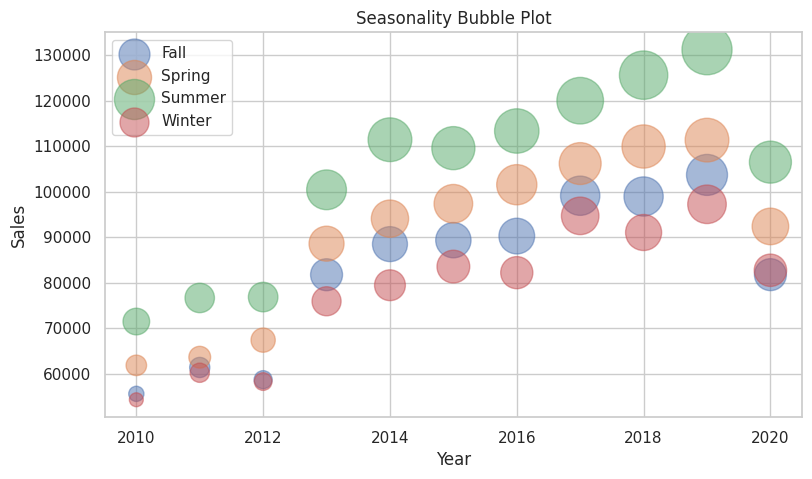

Saved: Bubble.png


In [ ]:

season_grp = df.groupby(['Year','Season'], as_index=False)['Sales'].sum().sort_values(['Season','Year'])
# Robust size normalization
s_min = season_grp['Sales'].min()
s_ptp = season_grp['Sales'].max() - season_grp['Sales'].min()
sizes = ((season_grp['Sales'] - s_min) / (s_ptp if s_ptp != 0 else 1)) * 1200 + 100

plt.figure(figsize=(9,5))
for s in season_grp['Season'].unique():
    mask = season_grp['Season'].eq(s).to_numpy()
    sub = season_grp.loc[mask]
    plt.scatter(sub['Year'], sub['Sales'], s=sizes[mask], alpha=0.5, label=s)
plt.title('Seasonality Bubble Plot'); plt.xlabel('Year'); plt.ylabel('Sales'); plt.legend()
plt.savefig('Bubble.png', dpi=150, bbox_inches='tight'); plt.show()
print("Saved: Bubble.png")


### TASK 1.6 — Scatter: Avg Price vs Sales (Recession) → `Scatter.png`

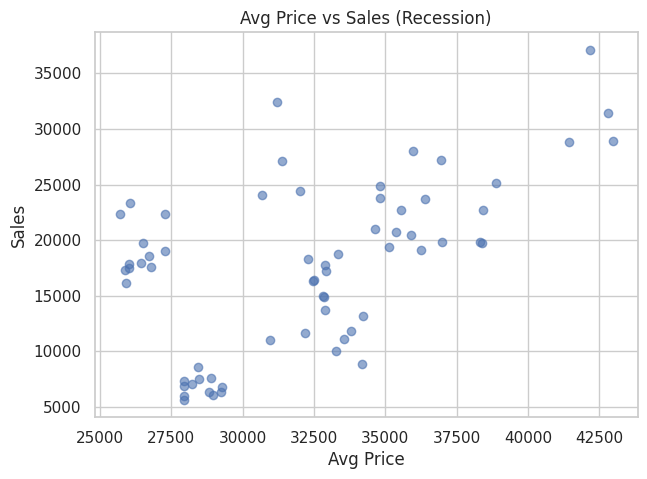

Saved: Scatter.png


In [ ]:

rec = df[df['Recession']==1]
plt.figure(figsize=(7,5))
plt.scatter(rec['Avg_Price'], rec['Sales'], alpha=0.6)
plt.title('Avg Price vs Sales (Recession)'); plt.xlabel('Avg Price'); plt.ylabel('Sales'); plt.grid(True)
plt.savefig('Scatter.png', dpi=150, bbox_inches='tight'); plt.show()
print("Saved: Scatter.png")


### TASK 1.7 — Pie: Ad spend share (Recession vs Non) → `Pie_1.png`

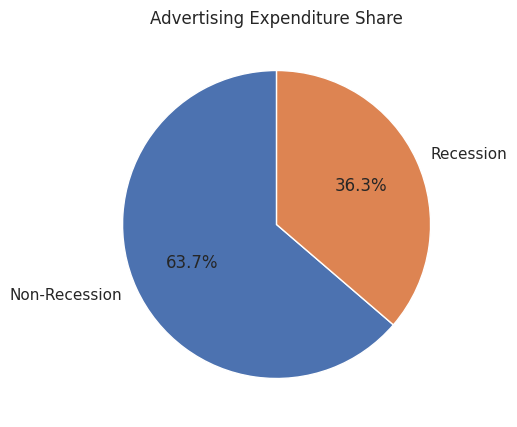

Saved: Pie_1.png


In [ ]:

ad_by_rec = df.groupby('Recession', as_index=False)['Ad_Expenditure'].sum()
labels = ad_by_rec['Recession'].map({0:'Non-Recession',1:'Recession'})
plt.figure(figsize=(5,5))
plt.pie(ad_by_rec['Ad_Expenditure'], labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Advertising Expenditure Share')
plt.savefig('Pie_1.png', dpi=150, bbox_inches='tight'); plt.show()
print("Saved: Pie_1.png")


### TASK 1.8 — Pie: Ad spend by vehicle type (Recession) → `Pie_2.png`

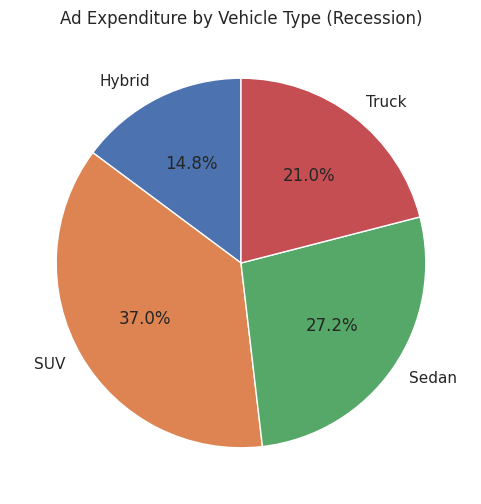

Saved: Pie_2.png


In [ ]:

ad_rec_vt = df[df['Recession']==1].groupby('Vehicle_Type', as_index=False)['Ad_Expenditure'].sum()
plt.figure(figsize=(6,6))
plt.pie(ad_rec_vt['Ad_Expenditure'], labels=ad_rec_vt['Vehicle_Type'], autopct='%1.1f%%', startangle=90)
plt.title('Ad Expenditure by Vehicle Type (Recession)')
plt.savefig('Pie_2.png', dpi=150, bbox_inches='tight'); plt.show()
print("Saved: Pie_2.png")


### TASK 1.9 — Line: Unemployment vs Sales (Recession) → `Line_plot_3.png`

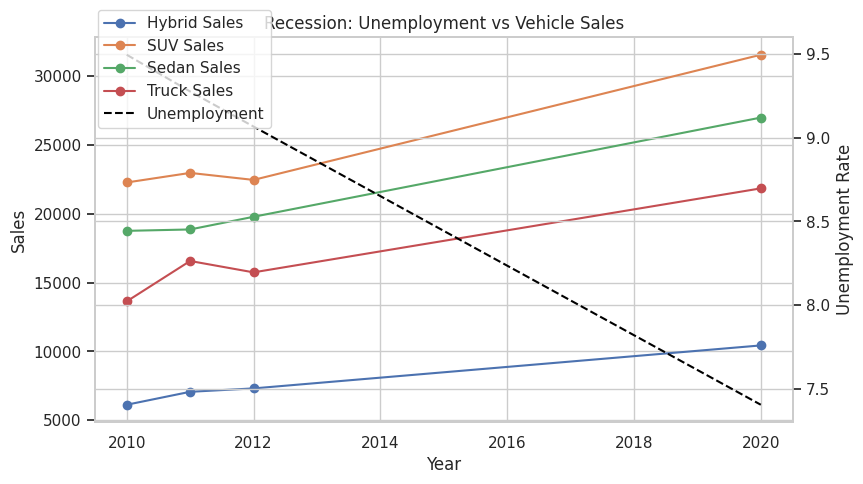

Saved: Line_plot_3.png


In [ ]:

rec = df[df['Recession']==1]
vt_year = rec.groupby(['Year','Vehicle_Type'], as_index=False)[['Sales','Unemployment']].mean()
fig, ax1 = plt.subplots(figsize=(9,5))
for vt, sub in vt_year.groupby('Vehicle_Type'):
    ax1.plot(sub['Year'], sub['Sales'], marker='o', label=f'{vt} Sales')
ax1.set_xlabel('Year'); ax1.set_ylabel('Sales')
ax2 = ax1.twinx()
ax2.plot(vt_year.groupby('Year')['Unemployment'].mean().index,
         vt_year.groupby('Year')['Unemployment'].mean().values,
         color='black', linestyle='--', label='Unemployment')
ax2.set_ylabel('Unemployment Rate')
fig.legend(loc='upper left', bbox_to_anchor=(0.12, 0.95))
plt.title('Recession: Unemployment vs Vehicle Sales')
plt.savefig('Line_plot_3.png', dpi=150, bbox_inches='tight'); plt.show()
print("Saved: Line_plot_3.png")


## Part 2 — Dash (inline, resilient) + static PNG exports

In [ ]:

import pandas as pd, numpy as np
import plotly.graph_objects as go

# --- Re-generate synthetic dataset ---
np.random.seed(7)
years = np.arange(2010, 2021)
vehicle_types = ["Sedan", "SUV", "Truck", "Hybrid"]
seasons = ["Winter", "Spring", "Summer", "Fall"]
rows = []
for y in years:
    for vt in vehicle_types:
        for s in seasons:
            recession = 1 if y in [2010, 2011, 2012, 2020] else 0
            base_sales = {"Sedan": 22000, "SUV": 26000, "Truck": 18000, "Hybrid": 8000}[vt]
            season_multiplier = {"Winter":0.9, "Spring":1.05, "Summer":1.2, "Fall":0.95}[s]
            rec_mult = 0.8 if recession else 1.0
            sales = int(base_sales * season_multiplier * rec_mult * (1 + 0.05*(y-2010)) + np.random.normal(0, 1200))
            unemployment = 7.5 - 0.2*(y-2010) + (2.0 if recession else 0.0) + np.random.normal(0, 0.3)
            rows.append([y, vt, s, sales, recession, unemployment])

df = pd.DataFrame(rows, columns=["Year","Vehicle_Type","Season","Sales","Recession","Unemployment"])

# --- Recession Report for "Sedan" ---
vehicle = "Sedan"
dfr = df[df["Vehicle_Type"] == vehicle]
rec = dfr[dfr["Recession"]==1].groupby("Year", as_index=False).agg({"Sales":"sum", "Unemployment":"mean"})

fig = go.Figure()
fig.add_bar(x=rec["Year"], y=rec["Sales"], name="Sales (Recession)")
fig.add_scatter(x=rec["Year"], y=rec["Unemployment"], mode="lines+markers",
                name="Unemployment", yaxis="y2")
fig.update_layout(title=f"Recession Report — {vehicle}",
                  yaxis_title="Sales",
                  yaxis2=dict(title="Unemployment", overlaying="y", side="right"))
fig.show()


/usr/local/lib/python3.12/dist-packages/kaleido/__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




## 3) Quick checklist of required filenames

In [ ]:

import os
required = [
    "Line_plot_1.png","Line_plot_2.png","Bar_Chart.png","Subplot.png","Bubble.png",
    "Scatter.png","Pie_1.png","Pie_2.png","Line_plot_3.png",
    "RecessionReportgraphs.png","YearlyReportgraphs.png"
]
missing = [f for f in required if not os.path.exists(f)]
present = [f for f in required if os.path.exists(f)]
print("Missing files:", missing)
print("Present files:", present)


Missing files: ['RecessionReportgraphs.png', 'YearlyReportgraphs.png']
Present files: ['Line_plot_1.png', 'Line_plot_2.png', 'Bar_Chart.png', 'Subplot.png', 'Bubble.png', 'Scatter.png', 'Pie_1.png', 'Pie_2.png', 'Line_plot_3.png']
